In [6]:
class PIDController:
    def __init__ (self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint

        self.previous_error = 0
        self.integral = 0
    
    def compute(self, process_variable, dt):
        # error
        error = self.setpoint - process_variable
        P_out = self.Kp * error
        self.integral = error * dt
        I_out = self.Ki * self.integral

        derivative = (error - self.previous_error)/dt
        D_out = self.Kd * derivative

        output = P_out + I_out + D_out
        self.previous_error = error

        return output

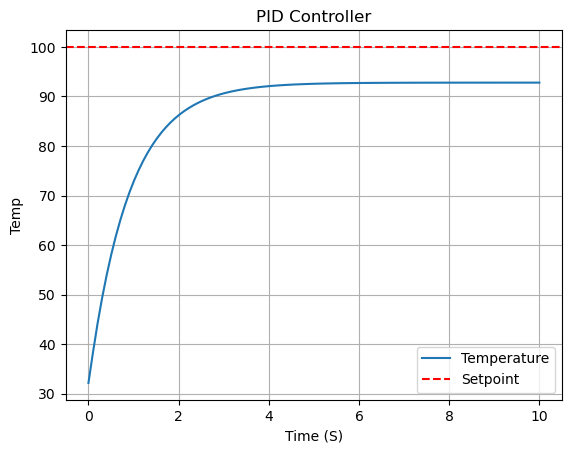

In [7]:
import matplotlib.pyplot as plt
import numpy as np

setpoint = 100
pid = PIDController(Kp=1, Ki = 0.1, Kd=0.05, setpoint=setpoint)

time = np.linspace(0, 10, 100)
dt = time[1] - time[0]
process_variable = 20 # Initial temperature
process_values = []

# Simulate
for t in time:
    control_output = pid.compute(process_variable, dt)

    process_variable += control_output * dt - 0.1 * (process_variable - 20) * dt

    process_values.append(process_variable)

# Plot
plt.plot(time, process_values, label="Temperature")
plt.axhline(y=setpoint, color='r', linestyle = '--', label='Setpoint')
plt.xlabel("Time (S)")
plt.ylabel("Temp")
plt.title("PID Controller")
plt.legend()
plt.grid()
plt.show()